In [1]:
import pandas as pd
import numpy as np

In [2]:
df_1=pd.read_csv('date_to_week_id_map.csv')

In [3]:
df_2=pd.read_csv('product_prices.csv')

In [4]:
df_1.shape

(821, 2)

In [5]:
df_2.shape

(59000, 4)

In [6]:
df_1.head()

,date,week_id
0,2012-01-01,49
1,2012-01-02,49
2,2012-01-03,49
3,2012-01-04,49
4,2012-01-05,49


In [7]:
df_2.head()

,outlet,product_identifier,week_id,sell_price
0,111,74,49,2.94
1,111,74,50,2.94
2,111,74,51,2.94
3,111,74,52,2.94
4,111,74,53,2.94


In [8]:
df=pd.merge(df_1,df_2,on='week_id')


In [9]:
df.head()

,date,week_id,outlet,product_identifier,sell_price
0,2012-01-01,49,111,74,2.94
1,2012-01-01,49,111,337,7.44
2,2012-01-01,49,111,423,0.97
3,2012-01-01,49,111,432,4.97
4,2012-01-01,49,111,581,4.88


In [10]:
df.shape

(410500, 5)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410500 entries, 0 to 410499
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   date                410500 non-null  object 
 1   week_id             410500 non-null  int64  
 2   outlet              410500 non-null  int64  
 3   product_identifier  410500 non-null  int64  
 4   sell_price          410500 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 18.8+ MB


In [12]:
df.describe()

,week_id,outlet,product_identifier,sell_price
count,410500.000000,410500.000000,410500.000000,410500.000000
mean,107.286236,211.200000,1509.960000,4.987666
std,33.858990,91.161287,809.799479,3.874637
min,49.000000,111.000000,74.000000,0.050000
25%,78.000000,113.000000,926.000000,2.680000
50%,107.000000,221.500000,1325.000000,3.980000
75%,137.000000,331.000000,1753.000000,6.480000
max,166.000000,333.000000,3021.000000,44.360000


<AxesSubplot:>

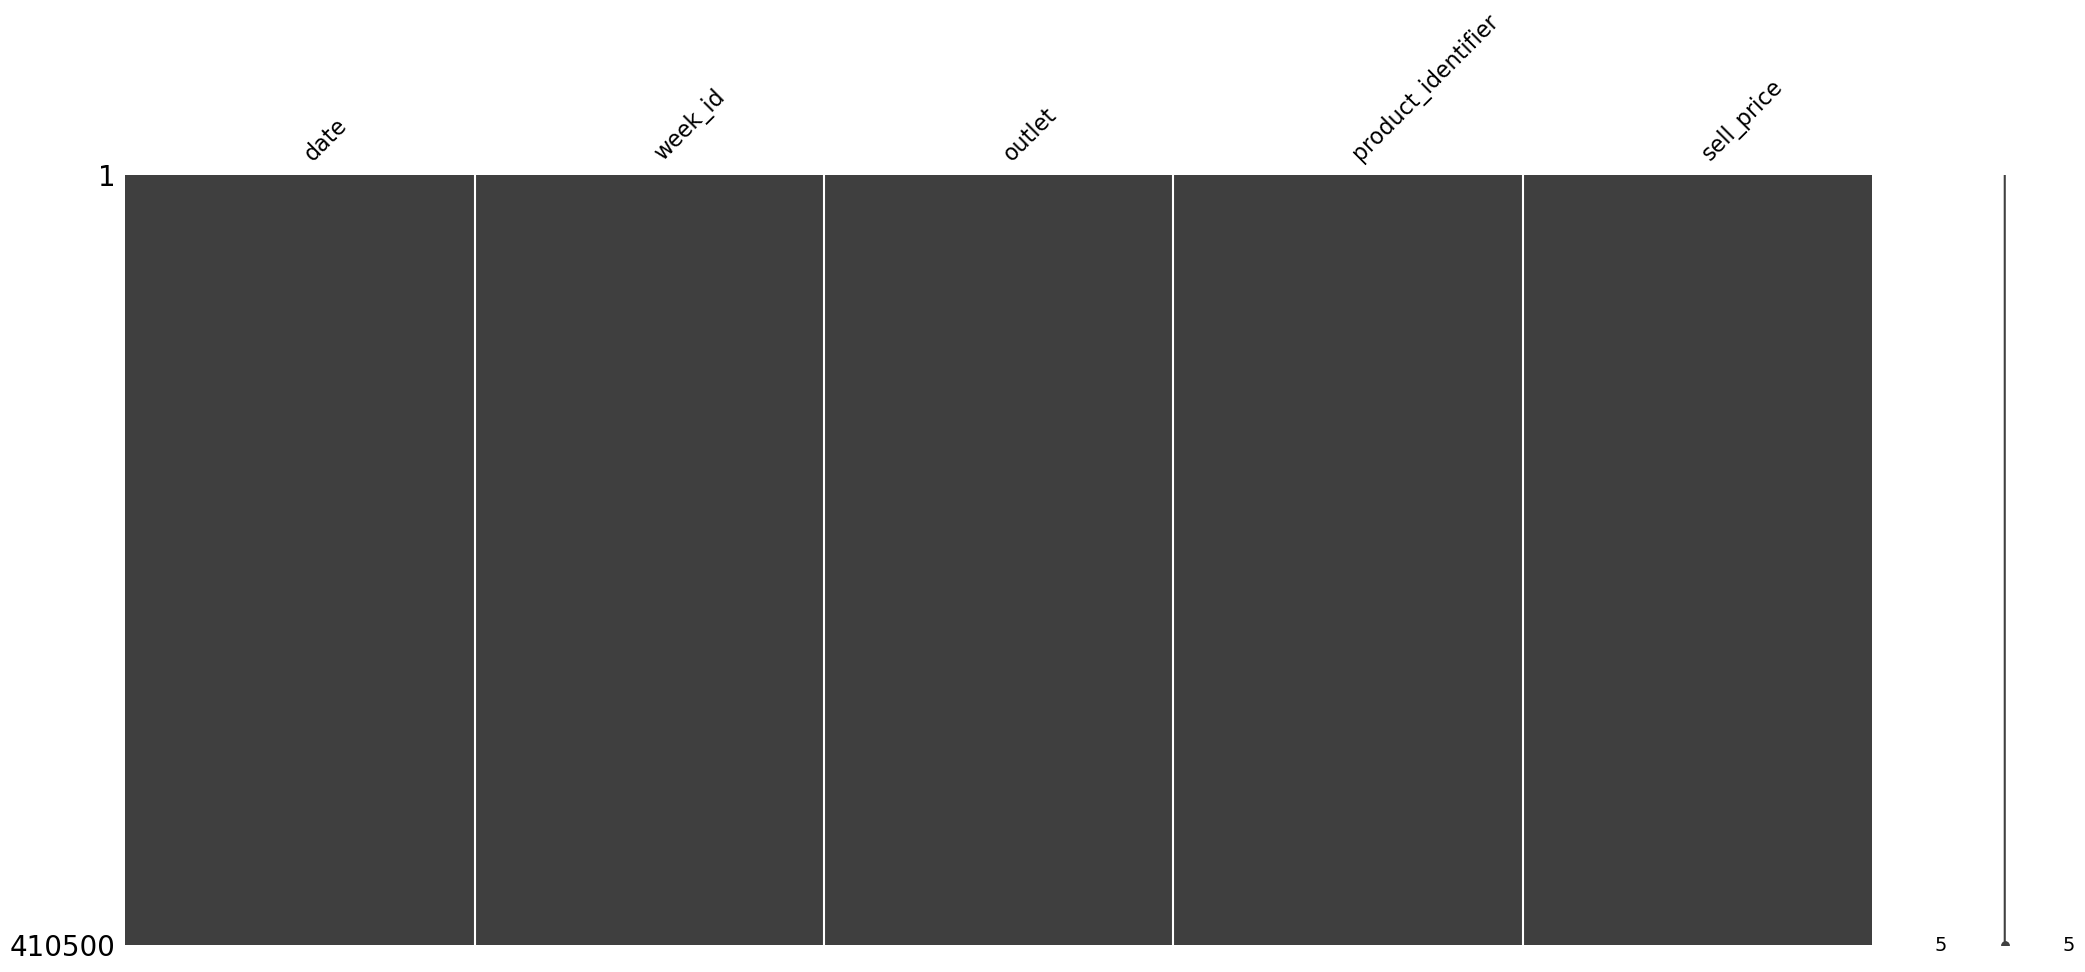

In [13]:
import missingno as mns
mns.matrix(df)

In [14]:
df.isnull().sum()

date                  0
week_id               0
outlet                0
product_identifier    0
sell_price            0
dtype: int64

In [15]:
df.isna().sum()

date                  0
week_id               0
outlet                0
product_identifier    0
sell_price            0
dtype: int64

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


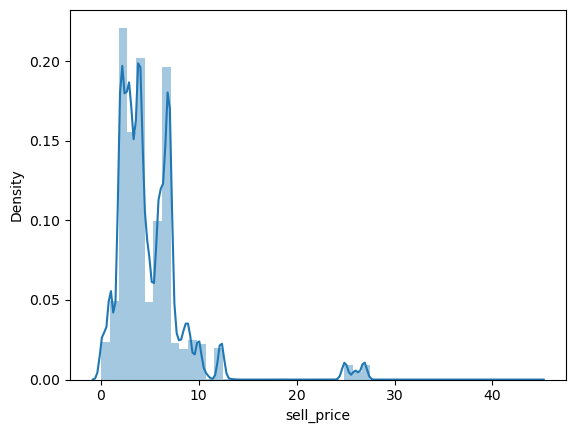

In [17]:
# Univariate Analysis
sns.distplot(df['sell_price'])
plt.show()

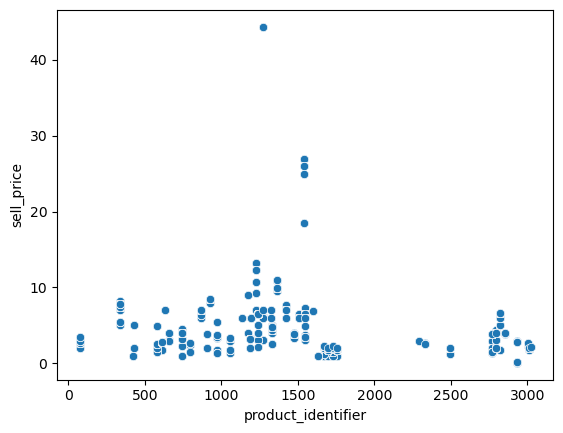

In [18]:
# Bivariate Analysis
sns.scatterplot(x="product_identifier", y="sell_price", data=df)
plt.show()

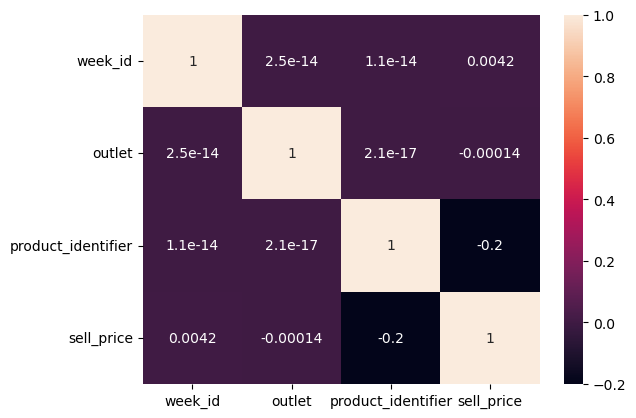

In [19]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [20]:

# Time Series Analysis
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df = df.set_index('date')
data_monthly = df.resample('M').mean()

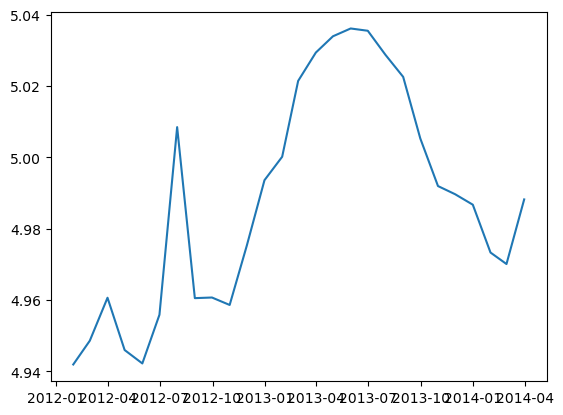

In [21]:
plt.plot(data_monthly['sell_price'])
plt.show()

In [22]:
df.dtypes

week_id                 int64
outlet                  int64
product_identifier      int64
sell_price            float64
dtype: object

In [23]:

# Split data into features and target
X = df.drop('sell_price', axis=1)
y = df['sell_price']


In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [25]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Initialize random forest regressor with 100 trees
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [27]:
# Fit the model on the training data
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [28]:
# Predict on the test data
y_pred = rf.predict(X_test)

In [29]:
# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

In [30]:
print("Mean squared error:", mse)

Mean squared error: 3.040354786845291e-05


In [31]:
r2 = r2_score(y_test, y_pred)

In [32]:
print("R-squared:", r2)

R-squared: 0.9999979711249801


In [33]:
# Defining a function for entropy
def entropy(p):
    if p == 0:
        return 0
    elif p == 1:
        return 0
    else:
        return - (p * np.log2(p) + (1 - p) * np.log2(1-p))

In [34]:
# Defining a function for information gain
def information_gain(left_child, right_child):
    parent = left_child + right_child
    p_parent = parent.count(1) / len(parent) if len(parent) > 0 else 0
    p_left = left_child.count(1) / len(left_child) if len(left_child) > 0 else 0
    p_right = right_child.count(1) / len(right_child) if len(right_child) > 0 else 0
    IG_p = entropy(p_parent)
    IG_l = entropy(p_left)
    IG_r = entropy(p_right)
    return IG_p - len(left_child) / len(parent) * IG_l - len(right_child) / len(parent) * IG_r

In [35]:
# Defining the bootstrap
def draw_bootstrap(X_train, y_train):
    bootstrap_indices = list(np.random.choice(range(len(X_train)), len(X_train), replace = True))
    oob_indices = [i for i in range(len(X_train)) if i not in bootstrap_indices]
    X_bootstrap = X_train.iloc[bootstrap_indices].values
    y_bootstrap = y_train[bootstrap_indices]
    X_oob = X_train.iloc[oob_indices].values
    y_oob = y_train[oob_indices]
    return X_bootstrap, y_bootstrap, X_oob, y_oob

In [36]:
# Defining Out-Of-Block Score
def oob_score(tree, X_test, y_test):
    mis_label = 0
    for i in range(len(X_test)):
        pred = predict_tree(tree, X_test[i])
        if pred != y_test[i]:
            mis_label += 1
    return mis_label / len(X_test)

In [37]:
# Function to find the best split
def find_split_point(X_bootstrap, y_bootstrap, max_features):
    feature_ls = list()
    num_features = len(X_bootstrap[0])

    while len(feature_ls) <= max_features:
      feature_idx = random.sample(range(num_features), 1)
      if feature_idx not in feature_ls:
        feature_ls.extend(feature_idx)

    best_info_gain = -999
    node = None
    for feature_idx in feature_ls:
     for split_point in X_bootstrap[:,feature_idx]:
        left_child = {'X_bootstrap': [], 'y_bootstrap': []}
        right_child = {'X_bootstrap': [], 'y_bootstrap': []}

        # split children for continuous variables
        if type(split_point) in [int, float]:
            for i, value in enumerate(X_bootstrap[:,feature_idx]):
                if value <= split_point:
                    left_child['X_bootstrap'].append(X_bootstrap[i])
                    left_child['y_bootstrap'].append(y_bootstrap[i])
                else:
                    right_child['X_bootstrap'].append(X_bootstrap[i])
                    right_child['y_bootstrap'].append(y_bootstrap[i])
        # split children for categoric variables
        else:
            for i, value in enumerate(X_bootstrap[:,feature_idx]):
                if value == split_point:
                    left_child['X_bootstrap'].append(X_bootstrap[i])
                    left_child['y_bootstrap'].append(y_bootstrap[i])
                else:
                    right_child['X_bootstrap'].append(X_bootstrap[i])
                    right_child['y_bootstrap'].append(y_bootstrap[i])

        split_info_gain = information_gain(left_child['y_bootstrap'], right_child['y_bootstrap'])
        if split_info_gain > best_info_gain:
            best_info_gain = split_info_gain
            left_child['X_bootstrap'] = np.array(left_child['X_bootstrap'])
            right_child['X_bootstrap'] = np.array(right_child['X_bootstrap'])
            node = {'information_gain': split_info_gain,
                    'left_child': left_child,
                    'right_child': right_child,
                    'split_point': split_point,
                    'feature_idx': feature_idx}


    return node

In [38]:
# Function to get the terminal node
def terminal_node(node):
    y_bootstrap = node['y_bootstrap']
    pred = max(y_bootstrap, key = y_bootstrap.count)
    return pred

In [39]:
# Function to find the split node
def split_node(node, max_features, min_samples_split, max_depth, depth):
    left_child = node['left_child']
    right_child = node['right_child']

    del(node['left_child'])
    del(node['right_child'])

    if len(left_child['y_bootstrap']) == 0 or len(right_child['y_bootstrap']) == 0:
        empty_child = {'y_bootstrap': left_child['y_bootstrap'] + right_child['y_bootstrap']}
        node['left_split'] = terminal_node(empty_child)
        node['right_split'] = terminal_node(empty_child)
        return

    if depth >= max_depth:
        node['left_split'] = terminal_node(left_child)
        node['right_split'] = terminal_node(right_child)
        return node

    if len(left_child['X_bootstrap']) <= min_samples_split:
        node['left_split'] = node['right_split'] = terminal_node(left_child)
    else:
        node['left_split'] = find_split_point(left_child['X_bootstrap'], left_child['y_bootstrap'], max_features)
        split_node(node['left_split'], max_depth, min_samples_split, max_depth, depth + 1)
    if len(right_child['X_bootstrap']) <= min_samples_split:
        node['right_split'] = node['left_split'] = terminal_node(right_child)
    else:
        node['right_split'] = find_split_point(right_child['X_bootstrap'], right_child['y_bootstrap'], max_features)
        split_node(node['right_split'], max_features, min_samples_split, max_depth, depth + 1)

In [40]:
# Function build the tree
def build_tree(X_bootstrap, y_bootstrap, max_depth, min_samples_split, max_features):
    root_node = find_split_point(X_bootstrap, y_bootstrap, max_features)
    split_node(root_node, max_features, min_samples_split, max_depth, 1)
    return root_node

In [41]:
# Defining the Random Forest 

def random_forest(X_train, y_train, n_estimators, max_features, max_depth, min_samples_split):
    tree_ls = list()
    oob_ls = list()
    for i in range(n_estimators):
        X_bootstrap, y_bootstrap, X_oob, y_oob = draw_bootstrap(X_train, y_train)
        tree = build_tree(X_bootstrap, y_bootstrap, max_features, max_depth, min_samples_split)
        tree_ls.append(tree)
        oob_error = oob_score(tree, X_oob, y_oob)
        oob_ls.append(oob_error)
    print("OOB estimate: {:.2f}".format(np.mean(oob_ls)))
    return tree_ls

In [42]:
# Defining the function for predict

def random_forest(X_train, y_train, n_estimators, max_features, max_depth, min_samples_split):
    tree_ls = list()
    oob_ls = list()
    for i in range(n_estimators):
        X_bootstrap, y_bootstrap, X_oob, y_oob = draw_bootstrap(X_train, y_train)
        tree = build_tree(X_bootstrap, y_bootstrap, max_features, max_depth, min_samples_split)
        tree_ls.append(tree)
        oob_error = oob_score(tree, X_oob, y_oob)
        oob_ls.append(oob_error)
    print("OOB estimate: {:.2f}".format(np.mean(oob_ls)))
    return tree_ls

In [43]:
# Defining the function to fit the model
def predict_rf(tree_ls, X_test):
    pred_ls = list()
    for i in range(len(X_test)):
        ensemble_preds = [predict_tree(tree, X_test.values[i]) for tree in tree_ls]
        final_pred = max(ensemble_preds, key = ensemble_preds.count)
        pred_ls.append(final_pred)
    return np.array(pred_ls)

In [44]:
# Defining the hyperparameters
n_estimators = 100
max_features = 3
max_depth = 10
min_samples_split = 2



In [45]:
model = random_forest(X_train, y_train, n_estimators=100, max_features=3, max_depth=10, min_samples_split=2)

NameError: name 'random' is not defined

In [ ]:
preds = predict_rf(model, X_test)
acc = sum(preds == y_test) / len(y_test)
print("Testing accuracy: {}".format(np.round(acc,3)))